In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv('/content/hospital_records_2021_2024_with_bills.csv')

In [3]:
df.head()

,Patient ID,Name,Date of Birth,Gender,Medical Condition,Treatments,Doctor's Notes,Admit Date,Discharge Date,Bill Amount
0,921d93d1-17b8-426f-abae-5b16c7e5cd93,Debra Griffith,1971-04-01,Female,Chronic Obstructive Pulmonary Disease,Medication,Patient requires home oxygen therapy.,2021-07-12,2021-07-13,14651.34
1,c3e70ecd-b794-4e9e-8136-ccf4ff363fe0,Robert Ross,1957-02-20,Female,Migraine,Pain Relief Medication,Follow-up to assess effectiveness of treatment.,2021-07-13,2021-08-09,718.94
2,ef85177f-f933-4f60-aefe-6979e35c709a,Rachel Perez,1987-11-27,Female,Urinary Tract Infection,Hydration,Monitor for any signs of worsening symptoms.,2021-07-14,2021-08-06,1765.14
3,8e36ba50-ebde-4b68-81b9-3cdca0b7eade,Michael Williams,2021-12-06,Male,Stroke,Physical Therapy,Referred to physical therapy for mobility impr...,2021-07-15,2021-08-05,21413.36
4,422bd94a-41e1-4bdc-96a3-f7570a868df1,Christopher Rodriguez,1990-12-19,Male,Hypertension,Lifestyle Changes,Patient started on antihypertensive medication.,2021-07-16,2021-07-20,4879.91


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient ID         1000 non-null   object 
 1   Name               1000 non-null   object 
 2   Date of Birth      1000 non-null   object 
 3   Gender             1000 non-null   object 
 4   Medical Condition  1000 non-null   object 
 5   Treatments         1000 non-null   object 
 6   Doctor's Notes     1000 non-null   object 
 7   Admit Date         1000 non-null   object 
 8   Discharge Date     1000 non-null   object 
 9   Bill Amount        1000 non-null   float64
dtypes: float64(1), object(9)
memory usage: 78.3+ KB


In [5]:
#Checking for duplicate values

df.duplicated().sum()

np.int64(0)

In [6]:
# Checking for missing values

df.isnull().sum()

,0
Patient ID,0
Name,0
Date of Birth,0
Gender,0
Medical Condition,0
Treatments,0
Doctor's Notes,0
Admit Date,0
Discharge Date,0
Bill Amount,0


In [7]:
# Converting date columns to datetime for calculations

df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])
df['Admit Date'] = pd.to_datetime(df['Admit Date'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Patient ID         1000 non-null   object        
 1   Name               1000 non-null   object        
 2   Date of Birth      1000 non-null   datetime64[ns]
 3   Gender             1000 non-null   object        
 4   Medical Condition  1000 non-null   object        
 5   Treatments         1000 non-null   object        
 6   Doctor's Notes     1000 non-null   object        
 7   Admit Date         1000 non-null   datetime64[ns]
 8   Discharge Date     1000 non-null   datetime64[ns]
 9   Bill Amount        1000 non-null   float64       
dtypes: datetime64[ns](3), float64(1), object(6)
memory usage: 78.3+ KB


In [9]:
# Calculating patient age and removing invalid entries

df['Age'] = (df['Admit Date'] - df['Date of Birth']).dt.days // 365

In [10]:
df['Age'].head()

,Age
0,50
1,64
2,33
3,-1
4,30


In [11]:
df[df['Age'] < 0]

,Patient ID,Name,Date of Birth,Gender,Medical Condition,Treatments,Doctor's Notes,Admit Date,Discharge Date,Bill Amount,Age
3,8e36ba50-ebde-4b68-81b9-3cdca0b7eade,Michael Williams,2021-12-06,Male,Stroke,Physical Therapy,Referred to physical therapy for mobility impr...,2021-07-15,2021-08-05,21413.36,-1
31,d03ee15d-4b2a-4d92-9f99-75df12227db8,David Smith,2023-08-20,Male,Sinusitis,Antibiotics,Prescribed decongestants to relieve sinus pres...,2021-08-21,2021-09-17,1370.50,-2
48,e8561512-6dcb-4ce1-9ee5-756174f40065,Henry Smith,2024-02-10,Female,Alzheimer's Disease,Cognitive Behavioral Therapy,Started on medication to slow progression of s...,2021-09-08,2021-09-28,6290.08,-3
53,272ebfdc-ee1c-4d5a-859f-9d505128eceb,Jonathan Schroeder,2023-06-19,Female,Stroke,Speech Therapy,Monitored for signs of stroke recurrence.,2021-09-14,2021-10-03,28489.14,-2
73,8fbd396c-963b-4098-b5fb-2e07b892fa3d,Erik Stewart,2024-07-01,Female,Cancer,Radiation Therapy,Discussed surgical options and potential outco...,2021-09-28,2021-10-13,27284.75,-3
116,dc12b127-960a-46b0-80c9-ac2836e8c0a4,Brian Sanders,2023-08-25,Male,Pneumonia,Oxygen Therapy,Monitor for any signs of respiratory distress.,2021-11-10,2021-11-30,19103.60,-2
130,acf26c03-bdbe-4a2f-a73b-05ce0907bd4b,Michelle Riley,2022-01-28,Female,Bronchitis,Rest,Monitor for any signs of worsening respiratory...,2021-12-01,2021-12-11,2919.32,-1
144,1872c7d1-407f-4428-ac81-1e54739a1608,Mary Fritz,2022-02-26,Female,Depression,Therapy,Prescribed antidepressant medication.,2021-12-20,2022-01-12,2473.17,-1
214,a78a00e7-e5e2-4124-aaae-3e0fa453f335,Brenda Marquez,2023-07-10,Male,Arthritis,Physical Therapy,Prescribed anti-inflammatory medication.,2022-03-05,2022-03-20,9840.50,-2
285,21198a84-530d-4342-b7b7-ee2299303002,Nancy Fox,2024-01-30,Female,Sinusitis,Decongestants,Started on antibiotics for bacterial infection.,2022-05-24,2022-06-08,2623.46,-2


In [12]:
df = df.drop(df[df['Age'] < 0].index)


In [13]:
df[df['Age'] < 0]

,Patient ID,Name,Date of Birth,Gender,Medical Condition,Treatments,Doctor's Notes,Admit Date,Discharge Date,Bill Amount,Age


In [14]:
# Calculating Length of Stay (LOS) for each patient

df['Length of Stay'] = (df['Discharge Date'] - df['Admit Date']).dt.days

In [15]:
df['Length of Stay']

,Length of Stay
0,1
1,27
2,23
4,4
5,4
...,...
995,6
996,26
997,24
998,26


In [16]:
df['Length of Stay'].describe()

,Length of Stay
count,987.000000
mean,15.635258
std,8.660646
min,1.000000
25%,8.000000
50%,16.000000
75%,23.000000
max,30.000000


In [17]:
df['Age'].describe()

,Age
count,987.000000
mean,49.135765
std,28.182321
min,0.000000
25%,25.000000
50%,50.000000
75%,72.000000
max,100.000000


In [18]:
# Creating Age Groups for demographic analysis

bins = [0 , 17 , 30 , 45 , 60 , 75 , 100]
labels = ['Childern(0-17)' , 'Young Adults(18-30)' , 'Adults(31-45)' , 'Middle-aged (46-60)' , 'Seniors(61-75)' , 'Elderly(76+)']

df['Age Group'] = pd.cut(df['Age'] , bins = bins , labels = labels , right = True)

In [19]:
df['Age Group']

,Age Group
0,Middle-aged (46-60)
1,Seniors(61-75)
2,Adults(31-45)
4,Young Adults(18-30)
5,Adults(31-45)
...,...
995,Young Adults(18-30)
996,Childern(0-17)
997,Elderly(76+)
998,Adults(31-45)


In [20]:
!pip install millify

  Preparing metadata (setup.py) ... done
  Created wheel for millify: filename=millify-0.1.1-py3-none-any.whl size=1843 sha256=e9d92c9807ec2ffe2b9c951a82bfbc0c9e88e10907e2e374ea9a43e450f44527
  Stored in directory: /root/.cache/pip/wheels/b8/39/e1/f23a73139bf4a560fec2be36901f5814b7f9f87053f1a4a102
Successfully built millify


In [21]:
# Calculating key metrics: total patients, gender distribution, average age and LOS, total billing

Total_Patients_Admitted  = df['Patient ID'].nunique( )
print(f"Total_Patients_Admitted : {Total_Patients_Admitted}\n")


Gender_Split_percentage = df['Gender'].value_counts(normalize = True)*100
Gender_Split_percentage = Gender_Split_percentage.round(2).astype(str) + '%'
print(f"Gender_Split_percentage :\n\n {Gender_Split_percentage}\n" )


Average_Patient_Age = int(df['Age'].mean())
print(f"Average_Patient_Age : {Average_Patient_Age} years \n")

Average_Length_of_Stay = df['Length of Stay'].mean().round(1)
print(f"Average_Length_of_Stay : {Average_Length_of_Stay} days \n")

from millify import millify
Total_Billing_Amount = df['Bill Amount'].sum()
Total_Billing_Amount = millify(Total_Billing_Amount , precision = 2)
print(f"Total_Billing_Amount : ${Total_Billing_Amount}\n")

Total_Patients_Admitted : 987

Gender_Split_percentage :

 Gender
Female    51.06%
Male      48.94%
Name: proportion, dtype: object

Average_Patient_Age : 49 years 

Average_Length_of_Stay : 15.6 days 

Total_Billing_Amount : $9.46M



### **Patient Demographics**

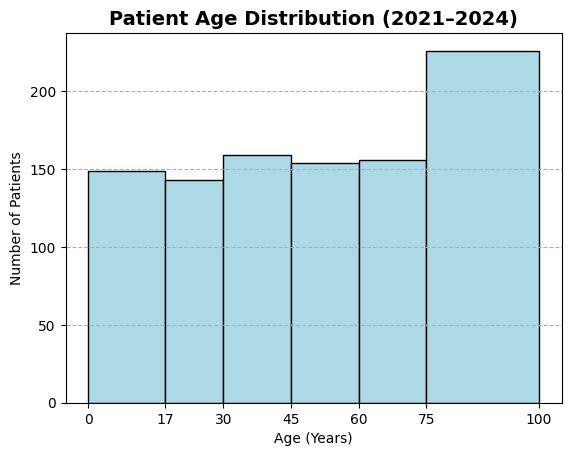

In [22]:
# Visulaization

# Patient Age Distribution (2021–2024)

bins = [0 , 17 , 30 , 45 , 60 , 75 , 100]
plt.hist(df['Age'], bins=bins, color='lightblue', edgecolor='black')
plt.title('Patient Age Distribution (2021–2024)', fontsize=14, fontweight='bold')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Patients')
plt.grid(axis='y', linestyle='--')
plt.xticks(bins)
plt.show()


Most patients fall between 75–100 years, showing the hospital primarily serves an elderly population.


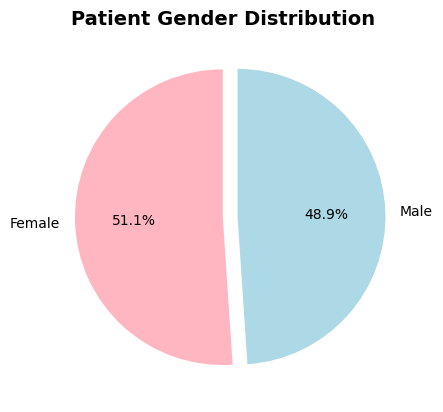

In [23]:
# Patient Gender Distribution

Gender_Split_percentage = df['Gender'].value_counts( )
plt.pie(Gender_Split_percentage ,
        labels = Gender_Split_percentage.index ,
        autopct = '%1.1f%%' ,
        startangle = 90 ,
        colors = (['lightpink' , 'lightblue']),
        explode = (0,0.1))
plt.title('Patient Gender Distribution' , fontsize = 14 , fontweight='bold' )
plt.show()

The patient population is almost evenly split, with a slight skew towards Female patients. This suggests no major gender bias in hospital admissions

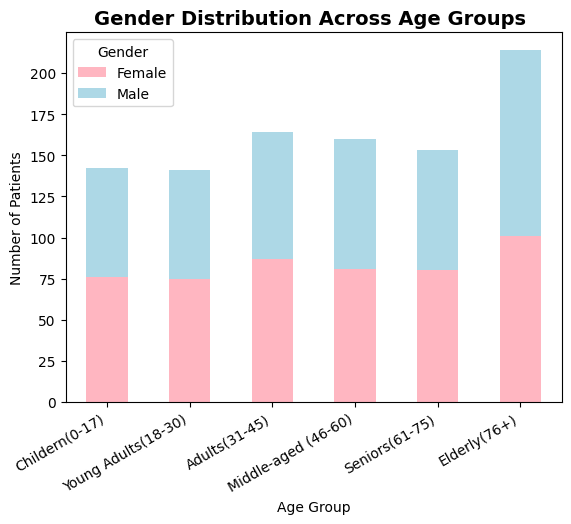

In [24]:
# Gender Distribution Across Age Groups

Age_Gender_Count = df.pivot_table(index = 'Age Group' , columns = 'Gender' , aggfunc= 'size' , fill_value=0 ,  observed=False )


Age_Gender_Count.plot(kind = 'bar' ,
                      stacked=True ,
                      color = ['lightpink' , 'lightblue'])
plt.title("Gender Distribution Across Age Groups ", fontsize=14, fontweight="bold")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Gender")
plt.show()

The gender split remains balanced across age groups, including elderly patients. This indicates that healthcare access and admissions are consistent for both males and females, with no significant disparity

### **Hospital Stay Patterns**

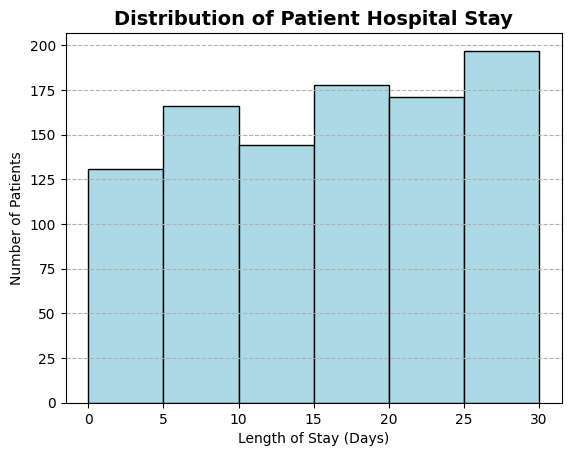

In [25]:
# Distribution of Patient Hospital Stay

bins = range(0, 31, 5)
plt.hist(df['Length of Stay'], bins=bins, color='lightblue', edgecolor='black')
plt.title('Distribution of Patient Hospital Stay', fontsize=14, fontweight='bold')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Number of Patients')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--')
plt.show()


The majority of patients stay is between 15–30 days, with the highest in the 25–30 day range. This indicates that extended care is common in the hospital, possibly due to elderly patients requiring longer recovery periods.

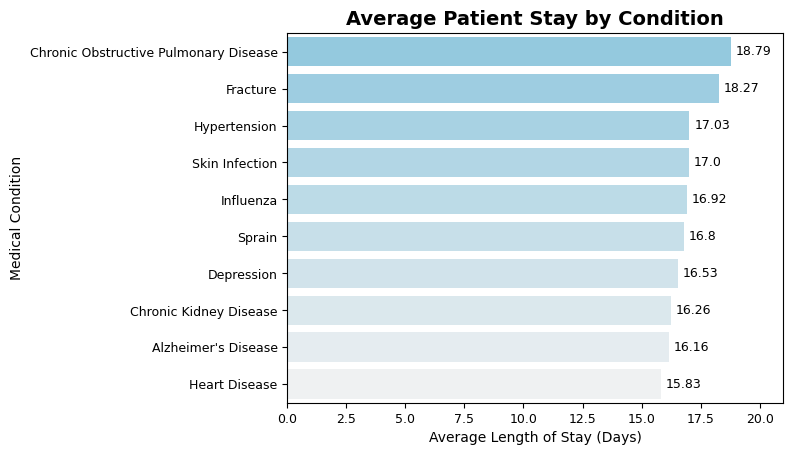

In [26]:
# Average Patient Stay by Condition

avg_los = df.groupby('Medical Condition')['Length of Stay'].mean().sort_values(ascending=False).head(10)

colors = sns.light_palette("skyblue", n_colors=len(avg_los))
sns.barplot(data = avg_los.reset_index(),
             x = 'Length of Stay',
             y = 'Medical Condition',
             hue = 'Length of Stay',
             palette= colors )

plt.xlabel('Average Length of Stay (Days)' , fontsize =10)
plt.ylabel('Medical Condition', fontsize=10)
plt.title('Average Patient Stay by Condition', fontsize=14, fontweight='bold')

plt.legend().remove()
plt.xlim(0, 21)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

for i, v in enumerate(avg_los.values):
    plt.text(v + 0.2,
             i,
             round(v,2),
             color='black',
             va='center',
             fontsize=9)

plt.show()

Most major medical conditions require around 2–3 weeks of hospitalization.

### **Medical Insights**

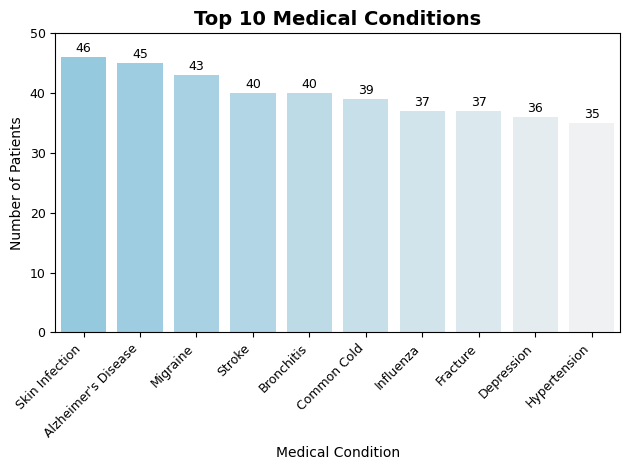

In [27]:
# Top 10 conditions
condition_counts = df['Medical Condition'].value_counts().head(10)


sns.barplot(
    x=condition_counts.index,
    y=condition_counts.values,
    hue=condition_counts.index,
    palette=sns.light_palette("skyblue", n_colors=len(condition_counts), reverse = True)
)


plt.xlabel('Medical Condition', fontsize=10)
plt.ylabel('Number of Patients', fontsize=10)
plt.title('Top 10 Medical Conditions', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, ha='right',fontsize=9)
plt.yticks(fontsize=9)
plt.ylim(0, 50)


for i, v in enumerate(condition_counts.values):
    plt.text(i, v + 0.3, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


The hospital treats a variety of conditions in similar numbers, with no single condition dominating.

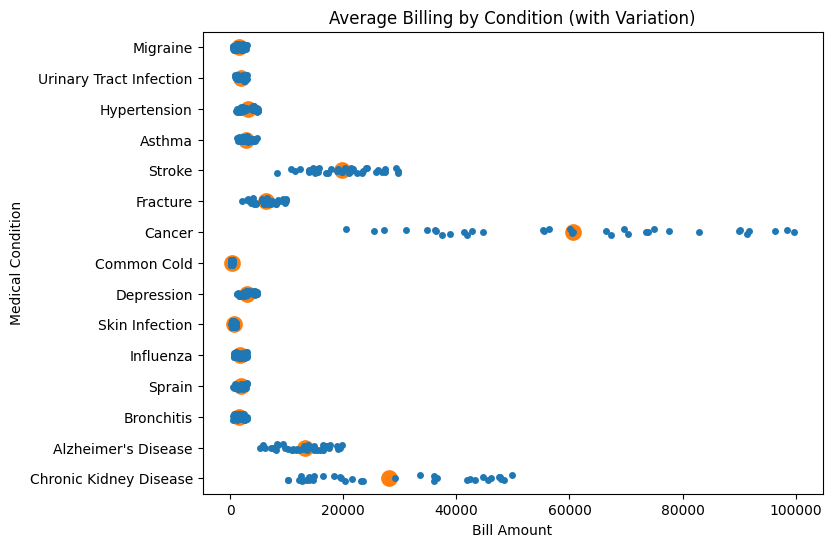

In [28]:
# Average Billing by Condition (with Variation)

top_conditions = df['Medical Condition'].value_counts().head(15).index
df_top10 = df[df['Medical Condition'].isin(top_conditions)]

plt.figure(figsize=(8,6))

sns.stripplot(
    x='Bill Amount',
    y='Medical Condition',
    data=df_top10,
    jitter=True,
    color="tab:blue"
)


sns.pointplot(
    x='Bill Amount',
    y='Medical Condition',
    data=df_top10,
    estimator='mean',
    errorbar=None,
    linestyle='none' ,
    color="tab:orange",
    markersize = 10
)


plt.title('Average Billing by Condition (with Variation)')
plt.xlabel('Bill Amount')
plt.ylabel('Medical Condition')
plt.show()

Cancer treatment costs are much more unpredictable and can be very high compared to other conditions. This shows the financial impact of complex diseases on patients

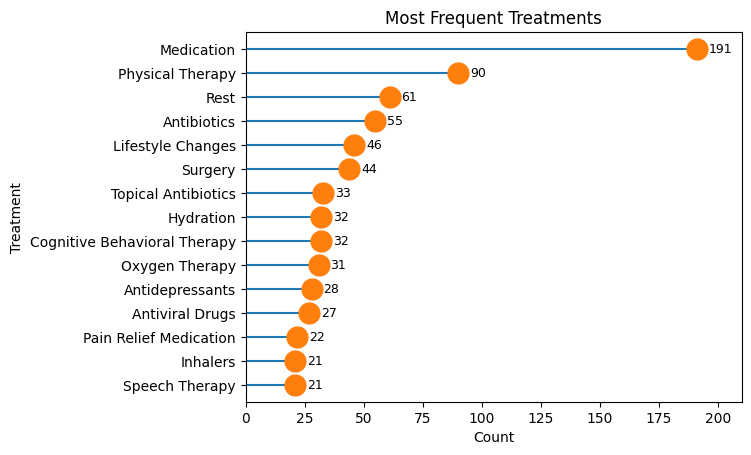

In [29]:
# Most Frequent Treatments

treatments = df['Treatments'].value_counts().head(15)

plt.hlines(y=treatments.index, xmin=0, xmax=treatments, color="tab:blue" )
plt.plot(treatments, treatments.index, "o", markersize = 15, color="tab:orange")

for i, v in enumerate(treatments):
    plt.text(v+5, i, str(v), va='center', fontsize=9)

plt.title("Most Frequent Treatments")
plt.xlabel("Count")
plt.ylabel("Treatment")
plt.xlim(0,210)
plt.gca().invert_yaxis()
plt.show()

Medication is the primary treatment method, showing that most cases are managed through drug-based care rather than surgery or other procedures

### **Financial Analysis**

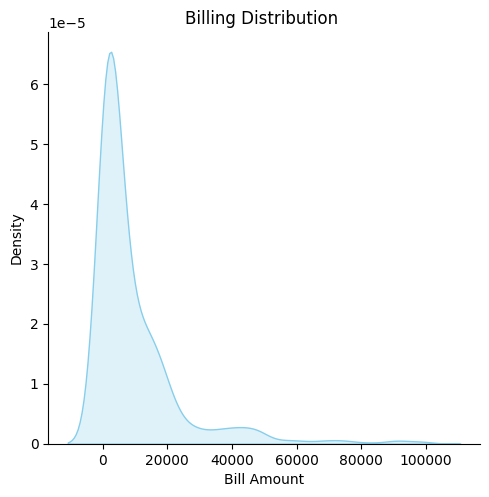

In [30]:
# Billing distribution

sns.displot(df['Bill Amount'] , kind = 'kde', color='skyblue', fill = True )
plt.title('Billing Distribution ')
plt.xlabel('Bill Amount')
plt.ylabel('Density')
plt.show()

Most patients have relatively low hospital bills (below 30,000), while only a few cases go up to 100,000. This shows that high-cost treatments are less common compared to affordable, routine care.

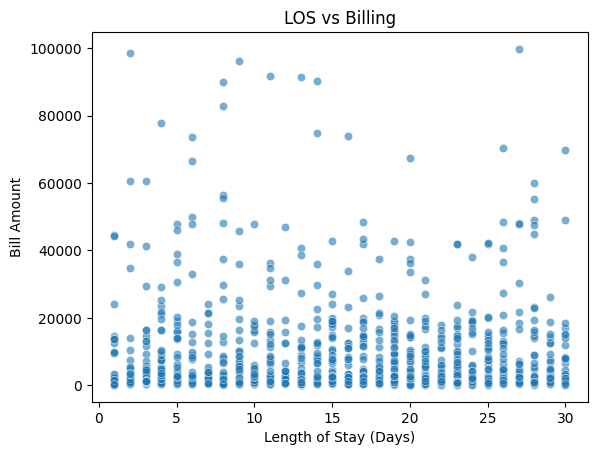

In [31]:
#LOS vs Billing
sns.scatterplot(
    x='Length of Stay',
    y='Bill Amount',
    data=df,
    color='tab:blue',
    alpha=0.6
)

plt.title("LOS vs Billing")
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Bill Amount")
plt.show()


Billing depends more on the type of treatment than the number of days stayed. Even short stays can be very costly, while some long stays may have lower bills.

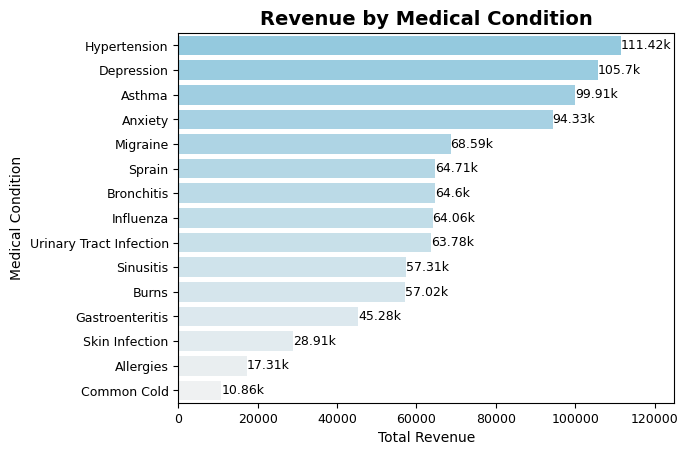

In [32]:
# Revenue by medical condition

revenue_by_condition = df.groupby("Medical Condition")["Bill Amount"].sum().sort_values(ascending=True).head(15)


sns.barplot(data = revenue_by_condition.reset_index(),
             x = 'Bill Amount',
             y = 'Medical Condition',
             hue = 'Bill Amount',
             palette= sns.light_palette("skyblue", n_colors=len(revenue_by_condition)))

plt.title("Revenue by Medical Condition", fontsize=14, fontweight="bold")
plt.xlabel("Total Revenue")
plt.ylabel("Medical Condition")
plt.gca().invert_yaxis()
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend().remove()
plt.xlim(0,125000)

for i, v in enumerate(revenue_by_condition.values):
    plt.text(v+5 , i, millify(v,precision =2), va='center', fontsize=9)


plt.show()


Chronic conditions like Hypertension bring in much higher revenue compared to minor illnesses like the Common Cold. This shows that long-term, serious diseases contribute more to hospital income than short, routine cases.

### **Hospital Trends**

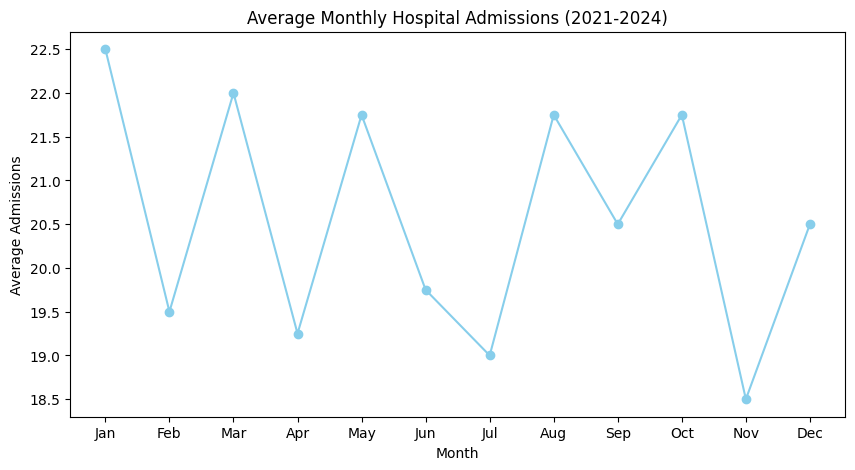

In [33]:
#Average Monthly Hospital Admissions (2021-2024)

df['MonthNum'] = df['Admit Date'].dt.month

monthly_avg = df.groupby('MonthNum').size() / df['Admit Date'].dt.year.nunique()

month_names = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
               7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
monthly_avg.index = monthly_avg.index.map(month_names)


plt.figure(figsize=(10,5))
plt.plot(monthly_avg.index, monthly_avg, marker='o', color='skyblue')
plt.title('Average Monthly Hospital Admissions (2021-2024)')
plt.xlabel('Month')
plt.ylabel('Average Admissions')
plt.show()

Admissions are fairly steady throughout the year with only small ups and downs. This shows the hospital has a consistent patient flow without strong seasonal variation

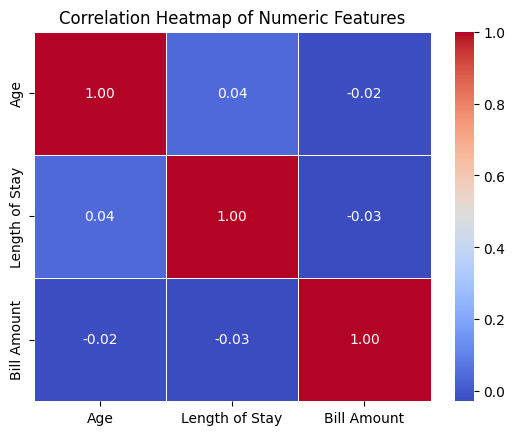

In [34]:
#Correlation Heatmap of Numeric Features

numeric_cols = ['Age', 'Length of Stay', 'Bill Amount']
corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

Age, billing, and hospital stay show very weak relationships. This means billing is not driven just by age or how long a patient stays, but more by the type of treatment or condition.